# Imports 

## general 

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import os
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

## PyalData

In [2]:
from pyaldata import *

# Load data

In [3]:
# TODO: add example data to the repo and run on that
data_dir = "/Users/bagibence/Box Sync/Imperial/data/"
fname = os.path.join(data_dir, "Chewie_CO_CS_2016-10-21.mat")

In [4]:
# load TrialData .mat file into a DataFrame
df = mat2dataframe(fname, shift_idx_fields=True)

Each trial is a row in the dataframe

By using `pandas` we get a lot of functionality for free.

In [5]:
df.head()

,monkey,date,task,target_direction,trial_id,result,bin_size,perturbation,perturbation_info,epoch,...,idx_peak_speed,idx_trial_end,pos,vel,acc,force,M1_spikes,M1_unit_guide,PMd_spikes,PMd_unit_guide
0,Chewie,10-21-2016,CO,0.785398,1,R,0.01,CS,-0.52,BL,...,369,446,"[[5.778064202616431, -35.397015549165786], [5....","[[-0.7793813732066821, 4.136785603960551], [-1...","[[-51.969786428074926, 14.202847093285325], [-...","[[0.12316992347195488, 0.2506054987408934], [0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
1,Chewie,10-21-2016,CO,1.570796,2,R,0.01,CS,-0.52,BL,...,312,374,"[[5.749738457404149, -24.643406091404042], [5....","[[1.9163909188240478, -2.763349295373866], [1....","[[-36.779409320972285, 1.7821809867372298], [-...","[[0.3685575721810173, 0.17911060954700603], [0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
2,Chewie,10-21-2016,CO,-1.570796,3,R,0.01,CS,-0.52,BL,...,341,405,"[[-0.08846028882207335, -21.796383214740942], ...","[[0.6600912719115256, -4.014682191879345], [0....","[[15.812499710917256, 16.621785484272777], [10...","[[0.3523246575179767, -0.09122904723894733], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
3,Chewie,10-21-2016,CO,3.141593,4,R,0.01,CS,-0.52,BL,...,269,326,"[[0.2044172614704891, -37.980265533779594], [0...","[[4.529933995107801, 4.629844429981232], [4.06...","[[-39.8450200830264, 25.037788333969146], [-48...","[[0.16886748091580156, 0.07539164418520175], [...","[[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
4,Chewie,10-21-2016,CO,-2.356194,5,R,0.01,CS,-0.52,BL,...,347,414,"[[-8.487759048702024, -29.610739441410566], [-...","[[3.3872550577518203, -0.3581721292107508], [4...","[[88.37767895758228, -30.26694467609077], [95....","[[0.5500420770141063, -0.39266117674997386], [...","[[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."


# Preprocess 

## combine time-bins into longer ones

Every function that returns a trial_data dataframe works on and returns a copy, so the original dataframe is not changed.

In [6]:
td = combine_time_bins(df, 2)

print(df.head().bin_size)
print()
print(td.head().bin_size)

0    0.01
1    0.01
2    0.01
3    0.01
4    0.01
Name: bin_size, dtype: float64

0    0.02
1    0.02
2    0.02
3    0.02
4    0.02
Name: bin_size, dtype: float64


Time-varying signals have new time coordinates

In [7]:
print("original: ", df.M1_spikes[0].shape)
print("combined: ", td.M1_spikes[0].shape)

original:  (457, 84)
combined:  (228, 84)


## Remove low-firing neurons 

In [8]:
td = remove_low_firing_neurons(td, "M1_spikes",  5)
td = remove_low_firing_neurons(td, "PMd_spikes", 5)

print("original: ", df.M1_spikes[0].shape)
print("removed:  ", td.M1_spikes[0].shape)

/Users/bagibence/Box Sync/Imperial/PyalData/pyaldata/tools.py:979: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


original:  (457, 84)
removed:   (228, 63)


## Transform signals

In [9]:
td = transform_signal(td, "M1_spikes",  'sqrt')
td = transform_signal(td, "PMd_spikes", 'sqrt')

# alternatively
# td = sqrt_transform_signal(td, "M1_spikes", "sqrt")

td.M1_spikes[0]

array([[0.        , 0.        , 0.        , ..., 1.41421356, 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 1.41421356, 1.        ,
        0.        ]])

For other transforms see the docstring of `transform_signal` (and the code).

## Merge signals from multiple areas 

In [10]:
td = merge_signals(td, ["M1_spikes", "PMd_spikes"], "both_spikes")

print(f"Merging M1 and PMd gives {td.M1_spikes[0].shape[1]} + {td.PMd_spikes[0].shape[1]} = {td.both_spikes[0].shape[1]} neurons")

Merging M1 and PMd gives 63 + 109 = 172 neurons


## Calculate firing rates from spikes 

In [11]:
# works on "_spikes" fields and automatically divides by bin_size
td = add_firing_rates(td, 'smooth')

For other fields use `smooth_signals`

Internally we use `numpy` arrays for generality but working with `xarray` can save you a lot of headaches and thinking.

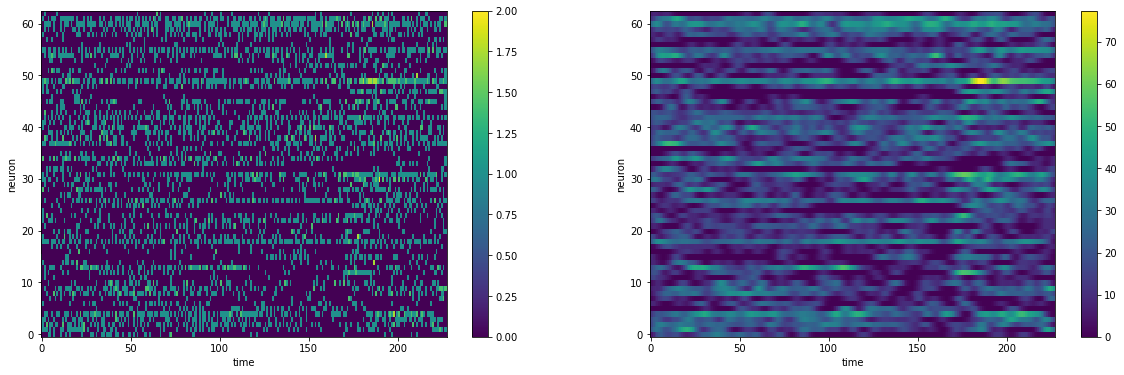

In [12]:
fig, ax = plt.subplots(figsize = (20, 6), ncols = 2)

xr.DataArray(td.M1_spikes[0], dims = ['time', 'neuron']).transpose('neuron', 'time').plot(ax=ax[0])
xr.DataArray(td.M1_rates[0],  dims = ['time', 'neuron']).transpose('neuron', 'time').plot(ax=ax[1])

## Keep only the successful trials

In [13]:
print("all trials:", td.shape[0])

td = select_trials(td, "result == 'R'")

print("successful trials:", td.shape[0])

all trials: 293
successful trials: 286


## Restrict time to an interval

* **Q**: should we rename `before` and `after` to `rel_start` and `rel_end` or something similar?

In [14]:
move_td = restrict_to_interval(td, "idx_movement_on", end_point_name=None, before=0, after=40)

print("first trial's length in full:", td.both_rates[0].shape)
print("first trial's length in the new dataframe:", move_td.both_rates[0].shape)

first trial's length in full: (228, 172)
first trial's length in the new dataframe: (41, 172)


# Dimensionality reduction

## Further preprocess by subtracting cross-condition mean 

In [15]:
# aka center per time point
move_td = subtract_cross_condition_mean(move_td)

## Apply PCA and FA 

In [16]:
from sklearn.decomposition import PCA, FactorAnalysis

In [17]:
pca_dims = 30
fa_dims = 2

move_td = tools.dim_reduce(move_td, PCA(pca_dims), "both_rates", "both_pca")
move_td = tools.dim_reduce(move_td, FactorAnalysis(fa_dims), "both_rates", "both_fa")

In [18]:
print(f"Reduced from {move_td['both_rates'][0].shape[1]} dimensions to {move_td['both_pca'][0].shape[1]}")

Reduced from 172 dimensions to 30


## Calculate target ID from target direction

In [19]:
def get_target_id(trial):
    return int(np.round((trial.target_direction + np.pi) / (0.25*np.pi))) - 1

# using pandas apply
move_td["target_id"] = move_td.apply(get_target_id, axis=1)

# using a list comprehension
#move_td["target_id"] = [get_target_id(trial) for (i, trial) in df.iterrows()]

## Trial averaging 

### Group by `target_id` and average

In [20]:
av_per_dir = trial_average(move_td, "target_id")

In [21]:
av_per_dir

,target_direction,bin_size,perturbation_info,idx_trial_start,idx_target_on,idx_go_cue,idx_movement_on,idx_peak_speed,idx_trial_end,pos,...,M1_unit_guide,PMd_spikes,PMd_unit_guide,both_spikes,M1_rates,PMd_rates,both_rates,both_pca,both_fa,target_id
0,-2.356194,0.02,-0.52,NaN,NaN,NaN,0.0,8.394737,39.064516,"[[-0.23688179989507785, -0.36996324319466917],...",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[-0.06953810410104687, 0.02075668884767882, 0...","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [0.263157...","[[-0.025739797144845172, -0.2641424895887824, ...","[[-1.3768337198349265, -7.671490726774552, -1....","[[-1.9131200351930613, -1.233225362990657, 3.2...","[[-1.3768337198349265, -7.671490726774552, -1....","[[-33.587026814515774, -24.7118469663875, 49.7...","[[-0.9174297015364706, 1.1719716605721233], [-...",0.0
1,-1.570796,0.02,-0.52,NaN,NaN,NaN,0.0,8.970588,40.285714,"[[0.04243524693505478, -0.5324067543076972], [...",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[-0.03703036416296638, -0.0615522474917233, 0...","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [7.0, 2.0...","[[-0.048959611386331224, -0.29045827906246663,...","[[-1.5325598551960107, -14.254720652550462, -4...","[[0.3207482087158063, 0.40174331050487855, 0.7...","[[-1.5325598551960107, -14.254720652550462, -4...","[[-3.4629921438717384, -40.737454559683805, 13...","[[0.04600143217983713, 1.5555380973862427], [0...",1.0
2,-0.785398,0.02,-0.52,NaN,NaN,NaN,0.0,9.263158,40.300000,"[[0.350513128403718, -0.3741507345529886], [0....",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[0.07294120017192932, -0.0055591006260052415,...","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [0.263157...","[[-0.025739797144845172, -0.2641424895887824, ...","[[-0.19689851440693615, -15.712295265106206, 8...","[[2.1262019548560396, 2.914896670181827, -3.29...","[[-0.19689851440693615, -15.712295265106206, 8...","[[45.4383273799782, -28.02694162964974, -26.29...","[[1.493892862684455, 0.7880548700442049], [1.6...",2.0
3,0.000000,0.02,-0.52,NaN,NaN,NaN,0.0,10.470588,41.000000,"[[0.4192450331565533, 0.14670106108002468], [0...",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[-0.007618599457084017, 0.0682775631663088, -...","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [7.0, 2.0...","[[0.0686874474371982, -0.29045827906246663, 0....","[[-0.7369906171396141, -15.017813952240896, 11...","[[0.3815787297758928, 1.9932489409165925, -4.5...","[[-0.7369906171396141, -15.017813952240896, 11...","[[59.9757561265625, 4.665475809991278, -41.300...","[[1.8134195177318437, -0.5909404725726153], [1...",3.0
4,0.785398,0.02,-0.52,NaN,NaN,NaN,0.0,10.030303,40.000000,"[[0.37782836641468703, 0.46267643576772666], [...",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[-0.06555086327170077, 0.12687396780450935, -...","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [7.0, 2.0...","[[0.012537714816877302, 0.012572023967836434, ...","[[0.24361697711807187, 0.30084274554006224, -3...","[[0.2449206302529509, 2.4894010679533687, -2.8...","[[0.24361697711807187, 0.30084274554006224, -3...","[[32.73303793304802, 34.76013913400561, -36.21...","[[0.8571264374326389, -1.507206544534516], [0....",4.0
5,1.570796,0.02,-0.52,NaN,NaN,NaN,0.0,12.888889,39.666667,"[[0.0694744740749151, 0.5321906410410623], [0....",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[0.0430349953141578, -0.15700030886814986, -0...","[[1.0, 1.0], [1.0, 2.0], [6.0, 1.0], [7.0, 2.0...","[[0.15535677841815018, 0.42699802995826097, -0...","[[3.4523153937481617, 16.788530176262512, -7.6...","[[-0.22586519495454438, -3.1499662903506422, 1...","[[3.4523153937481617, 16.788530176262512, -7.6...","[[-15.946289611438134, 29.7326130379709, -18.1...","[[-0.5329146212071201, -1.0956945210067093], [...",5.0
6,2.356194,0.02,-0.52,NaN,NaN,NaN,0.0,12.891892,NaN,"[[-0.3773516876932012, 0.29472940944353], [-0....",...,"[[1.0, 1.0], [1.0, 2.0], [5.0, 1.0], [5.0, 2.0...","[[0.03928124156040407, -0.04101121376074874, 0...","[[1.0, 1.0], [1.0, 2.0]

## Plot the trial-averaged projections in 2D

Text(0.5, 1.0, 'FA')

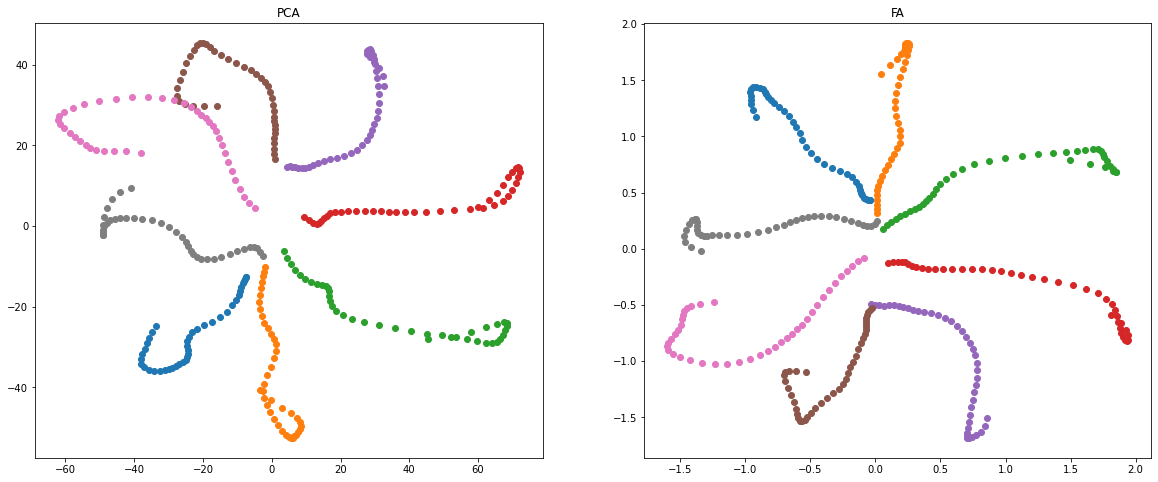

In [22]:
fig, ax = plt.subplots(figsize = (20, 8), ncols = 2)

for dir_pca in av_per_dir["both_pca"]:
    ax[0].scatter(*dir_pca[:, :2].T)
    
for dir_fa in av_per_dir["both_fa"]:
    ax[1].scatter(*dir_fa[:, :2].T)
    
ax[0].set_title('PCA')
ax[1].set_title('FA')

# Decode hand velocities from neural data using linear regression

In [23]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_val_score

In [24]:
for input_field in ["M1_rates", "PMd_rates", "both_rates", "both_pca"]:
    X = concat_trials(move_td, input_field)
    y = concat_trials(move_td, "vel")

    cv_scores = cross_val_score(LinearRegression(), X, y, cv = 5)
    
    print(f"{input_field}:\t{cv_scores.mean()}")

M1_rates:	0.7825647340546695
PMd_rates:	0.7503158200203005
both_rates:	0.8510728248388636
both_pca:	0.8333961267405915
